In [1]:
#
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)

In [2]:
#
market_data = pd.read_csv('../data/supermarket.csv', index_col = 'timestamp')


In [3]:
#
market_data.head(20)

,customer_no,location
timestamp,,
2019-09-02 07:03:00,10001,dairy
2019-09-02 07:03:00,10002,dairy
2019-09-02 07:04:00,10003,dairy
2019-09-02 07:04:00,10004,dairy
2019-09-02 07:04:00,10005,spices
2019-09-02 07:04:00,10006,spices
2019-09-02 07:04:00,10007,spices
2019-09-02 07:04:00,10008,fruit
2019-09-02 07:05:00,10001,checkout


In [5]:
#
mon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4884 entries, 2019-09-02 07:03:00 to 2019-09-02 21:50:00
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_no  4884 non-null   int64 
 1   location     4884 non-null   object
dtypes: int64(1), object(1)
memory usage: 114.5+ KB


In [5]:
# change index object type to datetime type
market_data.index = pd.to_datetime(market_data.index)

## Exploratory Data Analysis

- Calculate the total number of customers in each section
- Calculate the total number of customers in each section over time
- Display the number of customers at checkout over time
- Calculate the time each customer spent in the market
- Calculate the total number of customers in the supermarket over time
- Our business managers think that the first section customers visit follows a different pattern than the following ones.
Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”)


#### 1) Calculate the total number of customers in each section!

In [7]:
#
market_data.groupby('location').count()

,customer_no
location,
checkout,7417
dairy,4679
drinks,3905
fruit,5122
spices,3754


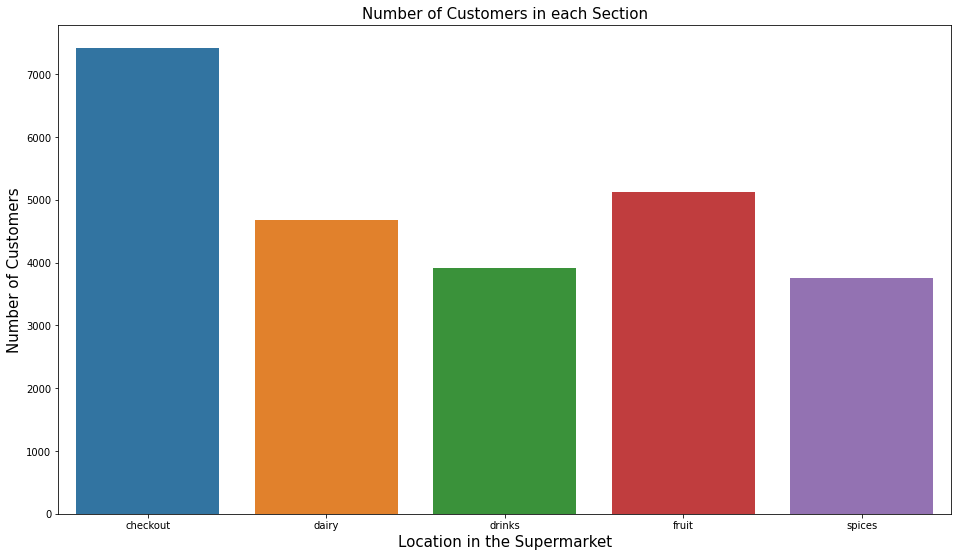

In [34]:
#
customer_per_section = market_data.groupby('location').count()
sns.barplot(x = customer_per_section.index, y = customer_per_section['customer_no'])
plt.xlabel('Location in the Supermarket', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)
plt.title('Number of Customers in each Section', fontsize = 15)
plt.show()

#### 2) Calculate the total number of customers in each section over time!

In [13]:
#
market_data.groupby(['timestamp', 'location']).count()

customer_no
timestamp           location             
2019-09-02 07:03:00 dairy               2
2019-09-02 07:04:00 dairy               2
                    fruit               1
                    spices              3
2019-09-02 07:05:00 checkout            2
...                                   ...
2019-09-06 21:50:00 checkout            2
                    dairy               1
                    drinks              1
                    fruit               1
                    spices              1

[13839 rows x 1 columns]

In [14]:
#
dairy = market_data[market_data['location'] == 'dairy']
fruit = market_data[market_data['location'] == 'fruit']
drinks = market_data[market_data['location'] == 'drinks']
spices = market_data[market_data['location'] == 'spices']

In [15]:
#
dairy_custom_by_time = dairy.groupby('timestamp').count()
fruit_custom_by_time = fruit.groupby('timestamp').count()
drinks_custom_by_time = drinks.groupby('timestamp').count()
spices_custom_by_time = spices.groupby('timestamp').count()

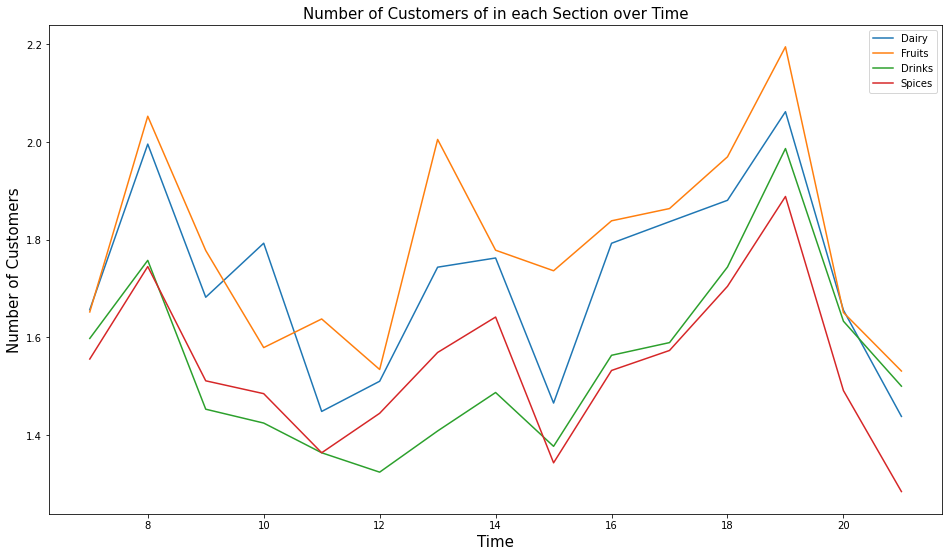

In [33]:
#
sns.lineplot(dairy_custom_by_time.index.hour, dairy_custom_by_time['customer_no'], label = 'Dairy', ci = None)
sns.lineplot(fruit_custom_by_time.index.hour, fruit_custom_by_time['customer_no'], label = 'Fruits', ci = None)
sns.lineplot(drinks_custom_by_time.index.hour, drinks_custom_by_time['customer_no'], label = 'Drinks', ci = None)
sns.lineplot(spices_custom_by_time.index.hour, spices_custom_by_time['customer_no'], label = 'Spices', ci = None)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)
plt.title('Number of Customers of in each Section over Time', fontsize = 15)
plt.show()

####  3) Display the number of customers at checkout over time!

In [23]:
#
checkout = market_data[market_data['location'] == 'checkout']
checkout_custom_by_time = market_data.groupby('timestamp').count()

,customer_no,location
timestamp,,
2019-09-02 07:05:00,10001,checkout
2019-09-02 07:05:00,10005,checkout
2019-09-02 07:06:00,10002,checkout
2019-09-02 07:06:00,10003,checkout
2019-09-02 07:07:00,10008,checkout
...,...,...
2019-09-06 21:47:00,51502,checkout
2019-09-06 21:48:00,51501,checkout
2019-09-06 21:48:00,51504,checkout


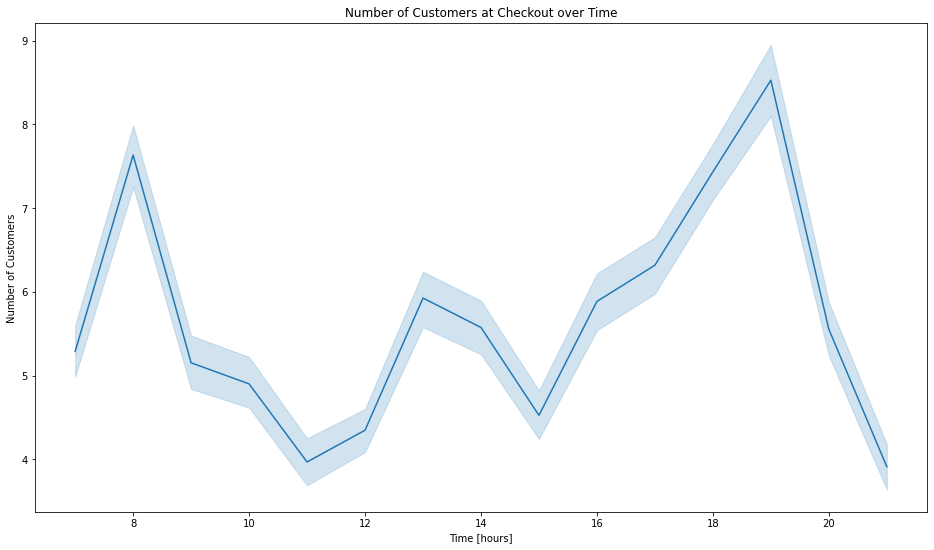

In [29]:
#
sns.lineplot(x = checkout_custom_by_time.index.hour, y = checkout_custom_by_time['customer_no'])
plt.xlabel('Time [hours]', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)
plt.title('Number of Customers at Checkout over Time', fontsize = 15)
plt.show()

#### 4) Calculate the time each customer spent in the market!

In [25]:
#
market_data['Timestamp'] = market_data.index
df = pd.DataFrame(market_data.groupby('customer_no').min()['Timestamp'])
df['Checkout_Time'] = market_data.groupby('customer_no').max()['Timestamp']
df['Spent_Time'] = df['Checkout_Time'] - df['Timestamp']
df.rename(columns = {'Timestamp': 'Start_Time'}, inplace = True)
df

,Start_Time,Checkout_Time,Spent_Time
customer_no,,,
10001,2019-09-02 07:03:00,2019-09-02 07:05:00,0 days 00:02:00
10002,2019-09-02 07:03:00,2019-09-02 07:06:00,0 days 00:03:00
10003,2019-09-02 07:04:00,2019-09-02 07:06:00,0 days 00:02:00
10004,2019-09-02 07:04:00,2019-09-02 07:08:00,0 days 00:04:00
10005,2019-09-02 07:04:00,2019-09-02 07:05:00,0 days 00:01:00
...,...,...,...
51506,2019-09-06 21:48:00,2019-09-06 21:48:00,0 days 00:00:00
51507,2019-09-06 21:48:00,2019-09-06 21:50:00,0 days 00:02:00
51508,2019-09-06 21:48:00,2019-09-06 21:50:00,0 days 00:02:00


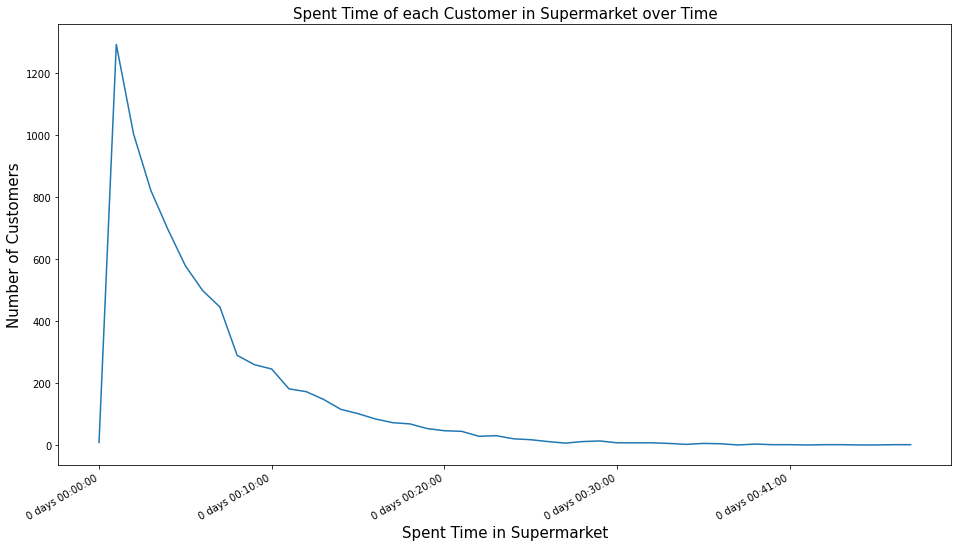

In [37]:
# 
groupby_spent_time = df.groupby('Spent_Time').count()
groupby_spent_time['Checkout_Time'].plot()
plt.xlabel('Spent Time in Supermarket', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)
plt.title('Spent Time of each Customer in Supermarket over Time', fontsize = 15)
plt.show()

#### 5) Calculate the total number of customers in the supermarket over time!

In [38]:
#
custom_over_time = pd.DataFrame(market_data.groupby('Timestamp').count()['customer_no'])
custom_over_time

,customer_no
Timestamp,
2019-09-02 07:03:00,2
2019-09-02 07:04:00,6
2019-09-02 07:05:00,4
2019-09-02 07:06:00,8
2019-09-02 07:07:00,4
...,...
2019-09-06 21:46:00,5
2019-09-06 21:47:00,4
2019-09-06 21:48:00,7


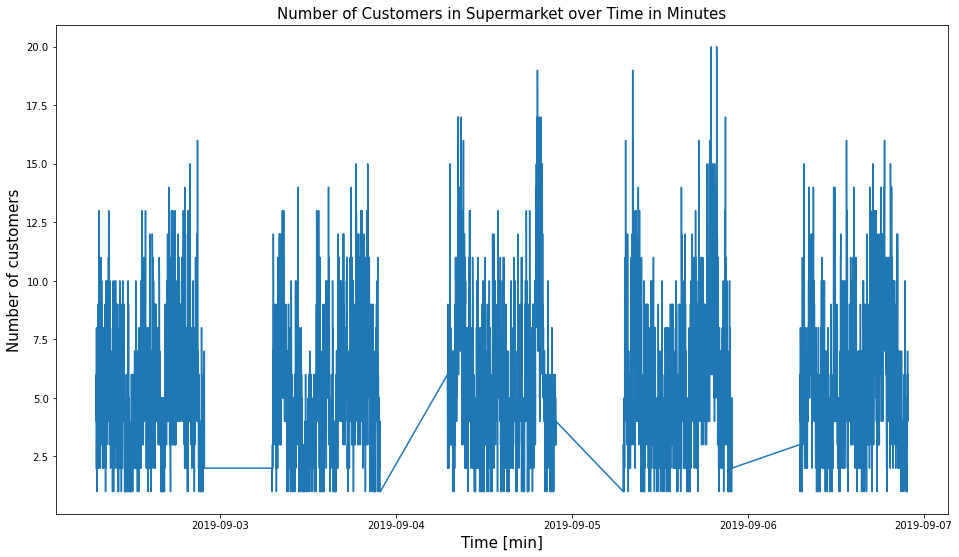

In [39]:
# number of customers per minute
sns.lineplot(x = custom_over_time.index, y = 'customer_no', data = custom_over_time)
plt.xlabel('Time [min]', fontsize = 15)
plt.ylabel('Number of customers', fontsize = 15)
plt.title('Number of Customers in Supermarket over Time in Minutes', fontsize = 15)
plt.show()

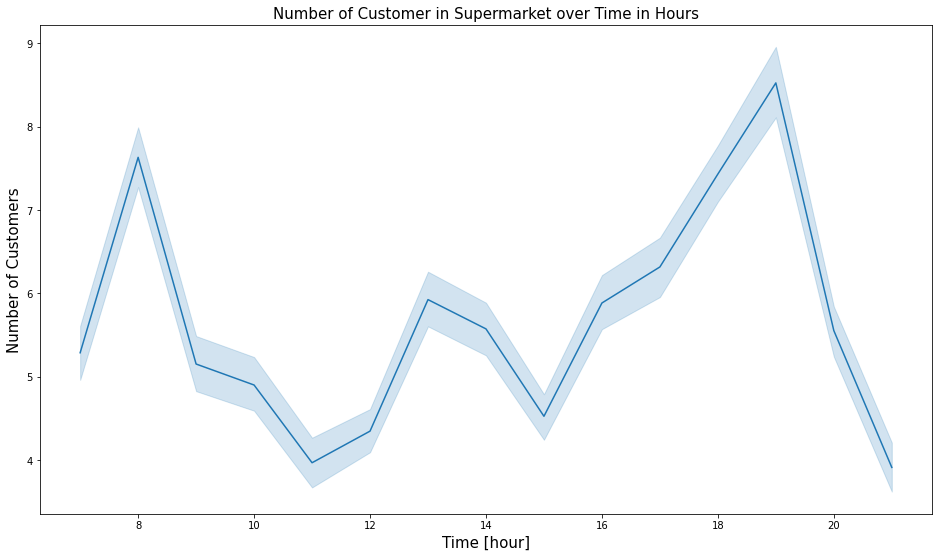

In [41]:
# number of customers for each hour
sns.lineplot(x = custom_over_time.index.hour, y = 'customer_no', data = custom_over_time)
plt.xlabel('Time [hour]', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)
plt.title('Number of Customer in Supermarket over Time in Hours', fontsize = 15)
plt.show()

#### 6) Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”)

In [43]:
#
market_data['First_Timestamp'] = market_data.duplicated('customer_no')
market_data

,customer_no,location,Timestamp,First_Timestamp
timestamp,,,,
2019-09-02 07:03:00,10001,dairy,2019-09-02 07:03:00,False
2019-09-02 07:03:00,10002,dairy,2019-09-02 07:03:00,False
2019-09-02 07:04:00,10003,dairy,2019-09-02 07:04:00,False
2019-09-02 07:04:00,10004,dairy,2019-09-02 07:04:00,False
2019-09-02 07:04:00,10005,spices,2019-09-02 07:04:00,False
...,...,...,...,...
2019-09-06 21:50:00,51500,dairy,2019-09-06 21:50:00,True
2019-09-06 21:50:00,51507,checkout,2019-09-06 21:50:00,True
2019-09-06 21:50:00,51508,checkout,2019-09-06 21:50:00,True


In [44]:
#
first_visited_sec = market_data.loc[~market_data['First_Timestamp'], 'location'].value_counts()
first_visited_sec

fruit     2810
dairy     2141
spices    1351
drinks    1143
Name: location, dtype: int64

In [50]:
#
follow_visited_sec = market_data.loc[market_data['First_Timestamp'] & ~ (market_data['location'] == 'checkout'), 'location'].value_counts()
follow_visited_sec

drinks    2762
dairy     2538
spices    2403
fruit     2312
Name: location, dtype: int64

In [52]:
#
visited_sec_total = pd.DataFrame({'First_Visited_Sections': first_visited_sec,
                                'Following_Visited_Sections': follow_visited_sec})
visited_sec_total

,First_Visited_Sections,Following_Visited_Sections
dairy,2141,2538
drinks,1143,2762
fruit,2810,2312
spices,1351,2403


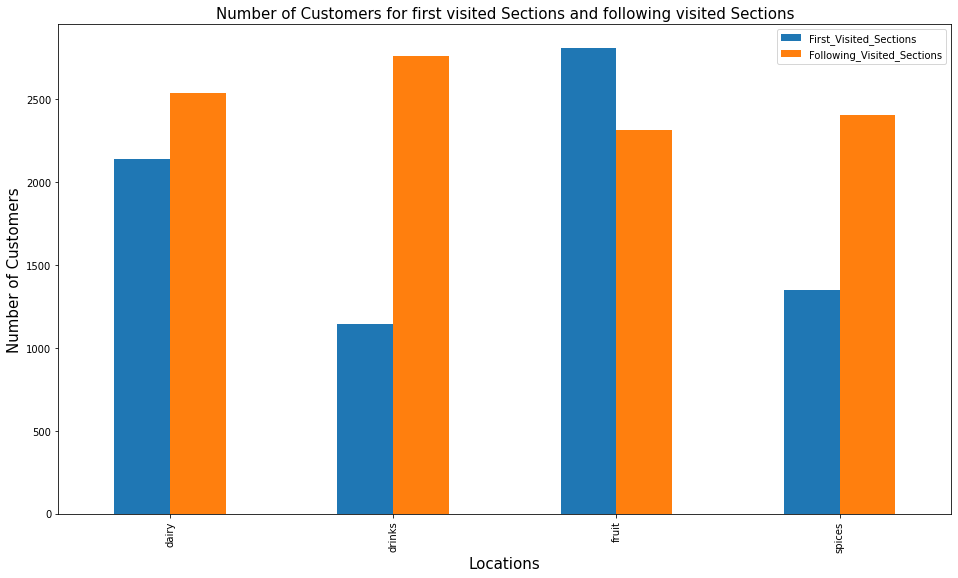

In [53]:
#
visited_sec_total.plot(kind = 'bar')
plt.xlabel('Locations', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)
plt.title('Number of Customers for first visited Sections and following visited Sections',fontsize = 15)
plt.show()